#### Problem Statement:

    * The following project is about Guvi Courses. The dataset for this project contains information
    about Guvi courses in various categories, including course title, URL, price, number of
    subscribers, number of reviews, number of lectures, course level, rating, content duration,
    published timestamp, and subject. With this dataset, we can track the performance of courses
    and uncover opportunities to generate revenue.

    * Design a regression model to predict the ratings given by the learners to the course.

##### importing the Depndencies

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
data = pd.read_csv('guvi.csv')

In [3]:
data.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Subject: Web Development


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   float64
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   float64
 4   num_subscribers      3676 non-null   float64
 5   num_reviews          3676 non-null   float64
 6   num_lectures         3676 non-null   float64
 7   level                3676 non-null   object 
 8   Rating               3676 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3677 non-null   object 
dtypes: float64(7), object(5)
memory usage: 345.1+ KB


In [5]:
data.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration
count,3.676000e+03,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000
mean,6.757535e+05,66.115343,3199.260881,156.309848,40.129761,0.610868,4.096137
std,3.431304e+05,61.056073,9486.582966,935.674518,50.398507,0.334287,6.054948
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.074740e+05,20.000000,112.000000,4.000000,15.000000,0.280000,1.000000
50%,6.876920e+05,45.000000,912.500000,18.000000,25.000000,0.760000,2.000000
75%,9.608140e+05,95.000000,2558.000000,67.000000,46.000000,0.930000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,1.000000,78.500000


In [6]:
data.shape

(3680, 12)

In [7]:
data.columns

Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [8]:
data.apply(lambda x: sum(x.isnull()),axis=0)

course_id              4
course_title           4
url                    4
price                  4
num_subscribers        4
num_reviews            4
num_lectures           4
level                  4
Rating                 4
content_duration       4
published_timestamp    4
subject                3
dtype: int64

In [9]:
columns_to_fill_empty = ['course_id', 'course_title', 'url']
data[columns_to_fill_empty] = data[columns_to_fill_empty].fillna('')

In [10]:
columns_to_fill_mean = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'Rating']
data[columns_to_fill_mean] = data[columns_to_fill_mean].fillna(data[columns_to_fill_mean].mean())

In [11]:
columns_to_fill_mode = ['level', 'subject']
for col in columns_to_fill_mode:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [12]:
data.dropna(subset=['published_timestamp'], inplace=True)

In [13]:
# Check for missing values after cleaning
missing_values_after_cleaning = data.isnull().sum()
print(missing_values_after_cleaning)

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
Rating                 0
content_duration       0
published_timestamp    0
subject                0
dtype: int64


In [14]:
data.apply(lambda x: sum(x.isnull()),axis=0)

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
Rating                 0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

#### Data Visualization

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

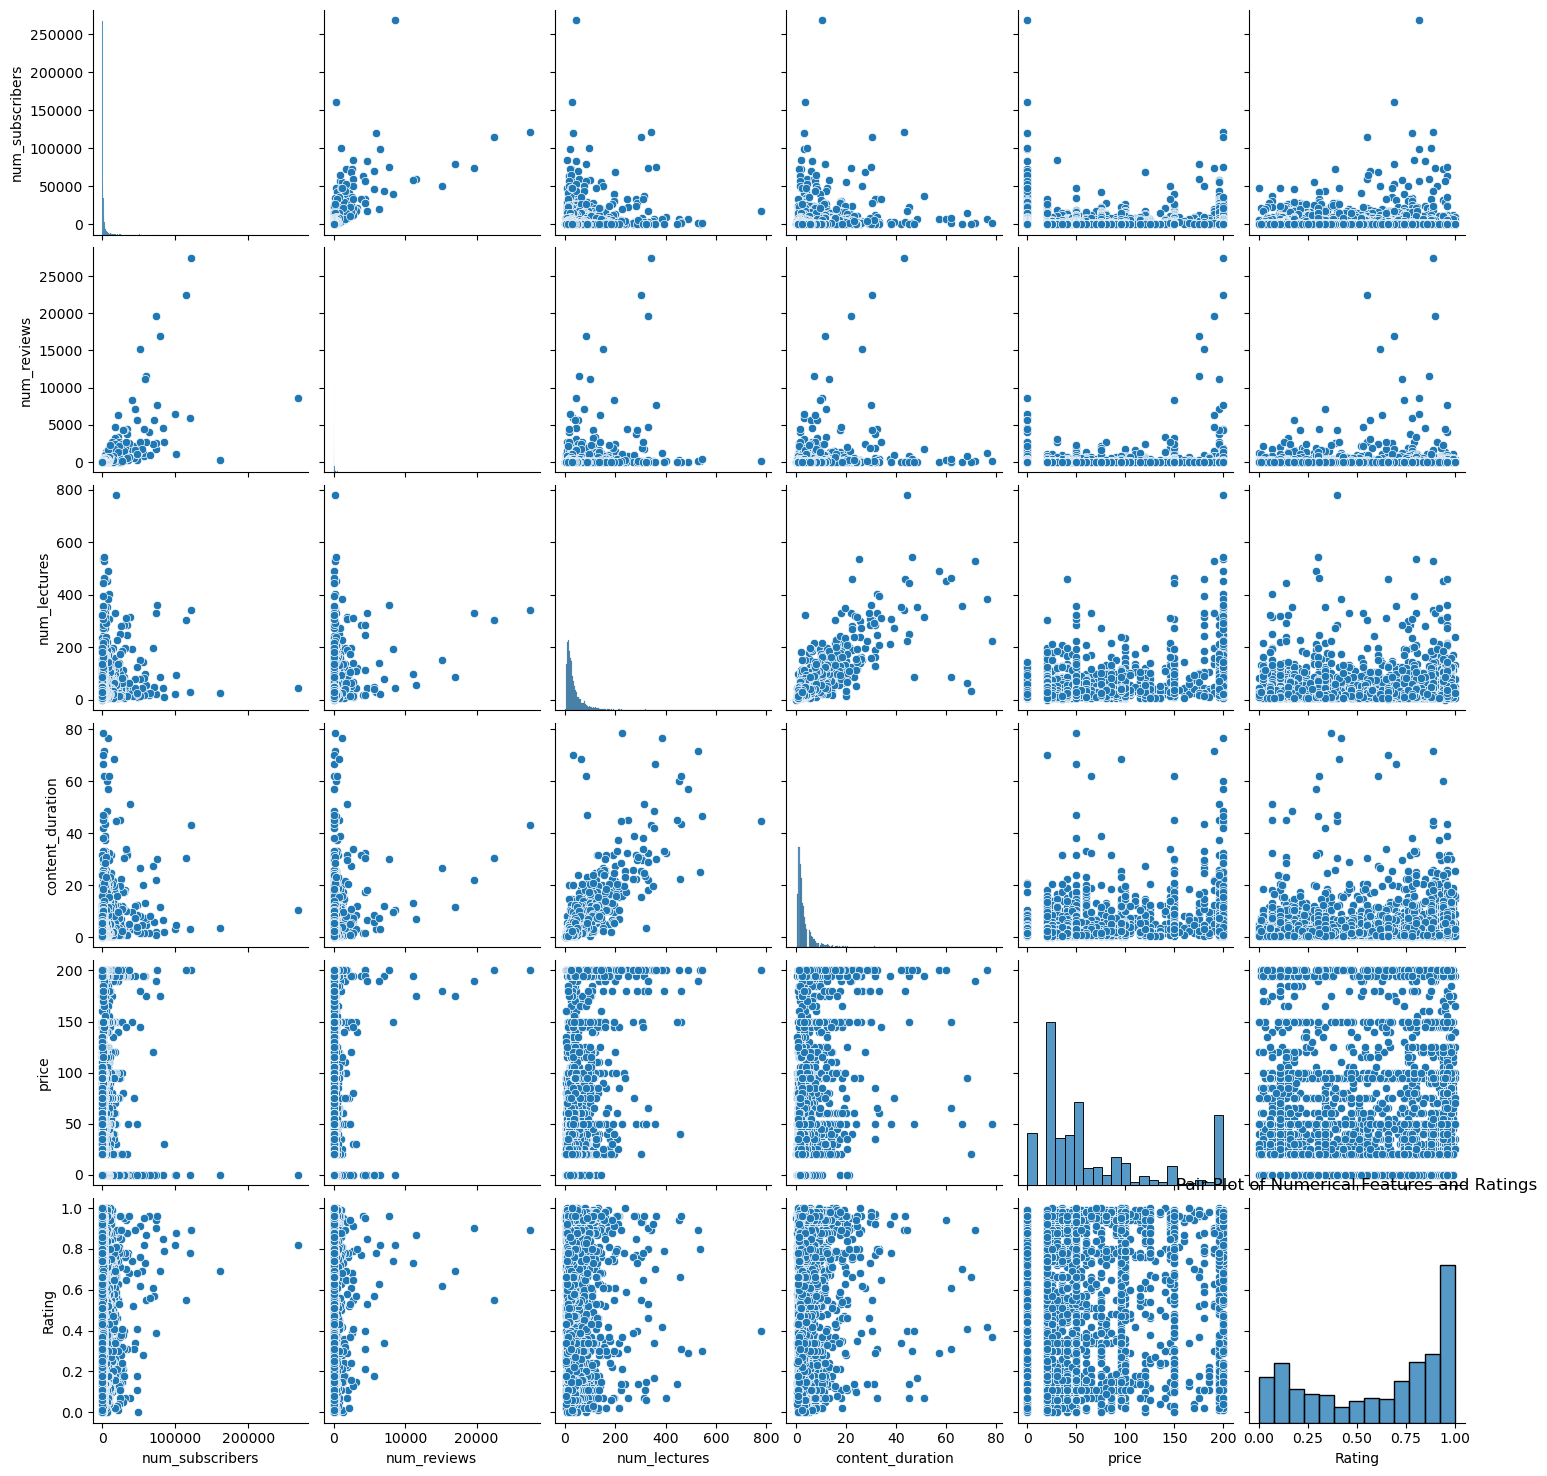

In [16]:
# Create a pair plot for selected numerical features
sns.pairplot(data=data, vars=['num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'price', 'Rating'])
plt.title("Pair Plot of Numerical Features and Ratings")
plt.show()

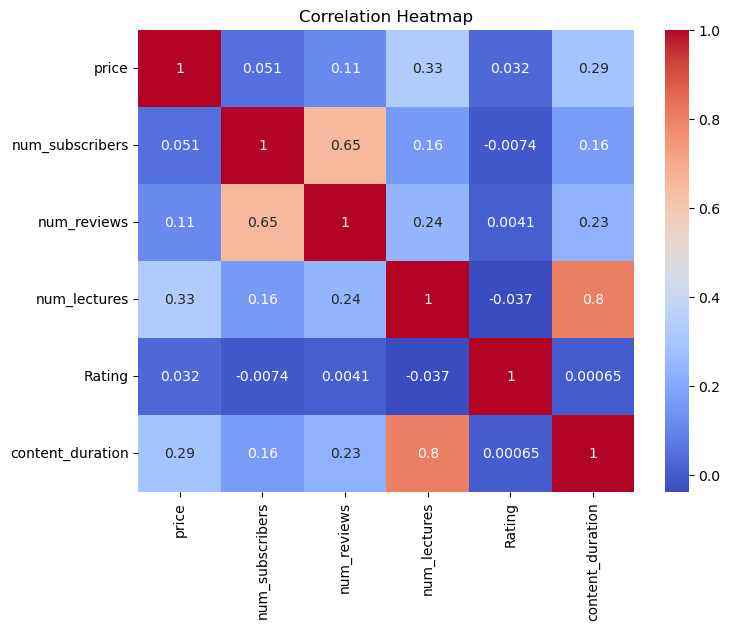

In [17]:
# Create a correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

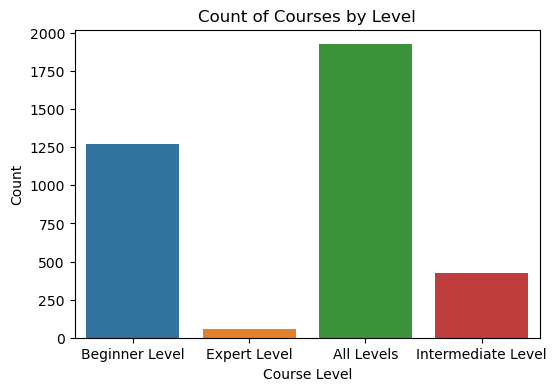

In [18]:
# Create a bar plot for course levels
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='level')
plt.title("Count of Courses by Level")
plt.xlabel("Course Level")
plt.ylabel("Count")
plt.show()

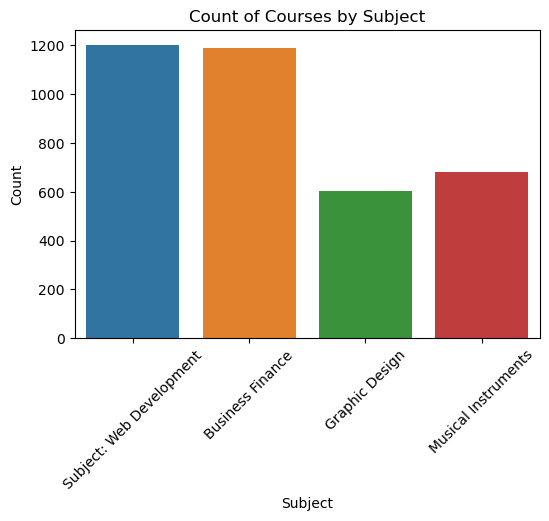

In [19]:
# Create a bar plot for subjects
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='subject')
plt.title("Count of Courses by Subject")
plt.xlabel("Subject")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

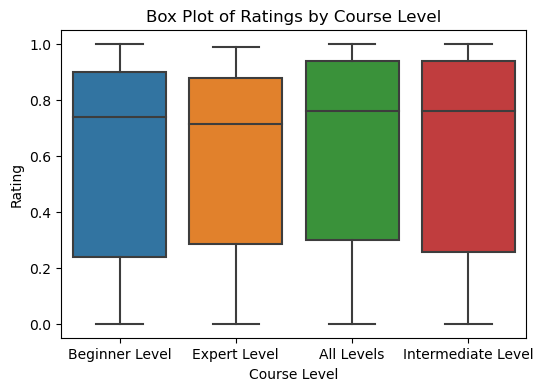

In [20]:
# Box plot of Ratings by Course Level
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='level', y='Rating')
plt.title("Box Plot of Ratings by Course Level")
plt.xlabel("Course Level")
plt.ylabel("Rating")
plt.show()

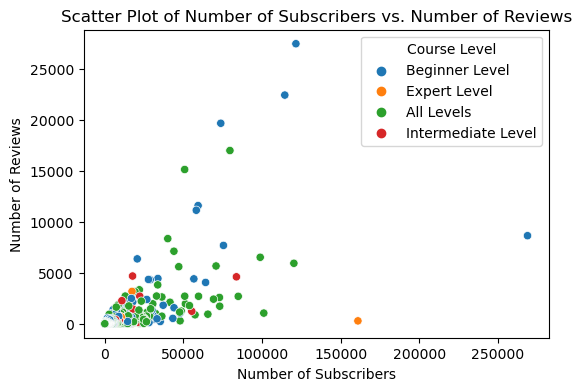

In [21]:
# Scatter plot of Number of Subscribers vs. Number of Reviews
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='num_subscribers', y='num_reviews', hue='level')
plt.title("Scatter Plot of Number of Subscribers vs. Number of Reviews")
plt.xlabel("Number of Subscribers")
plt.ylabel("Number of Reviews")
plt.legend(title='Course Level')
plt.show()

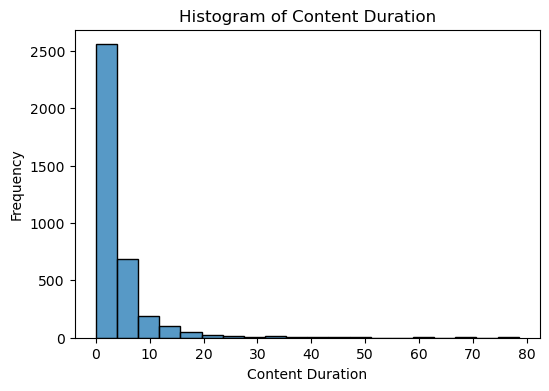

In [22]:
# Histogram of Content Duration
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='content_duration', bins=20)
plt.title("Histogram of Content Duration")
plt.xlabel("Content Duration")
plt.ylabel("Frequency")
plt.show()

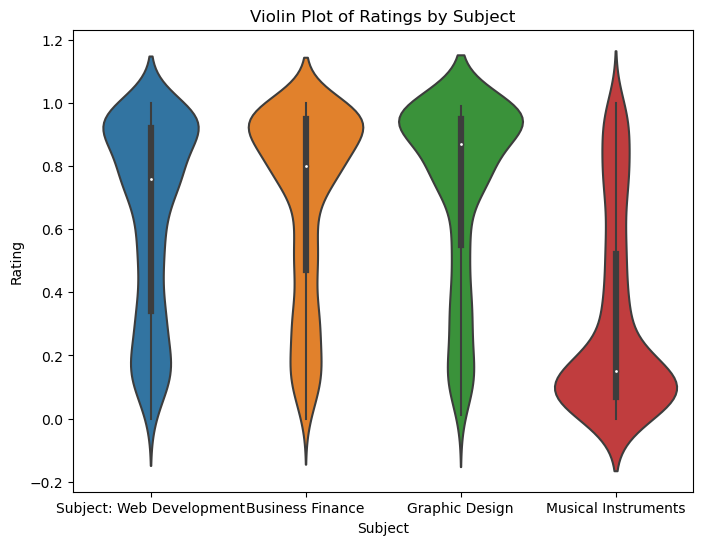

In [23]:
# Violin plot of Ratings by Subject
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='subject', y='Rating')
plt.title("Violin Plot of Ratings by Subject")
plt.xlabel("Subject")
plt.ylabel("Rating")
plt.show()

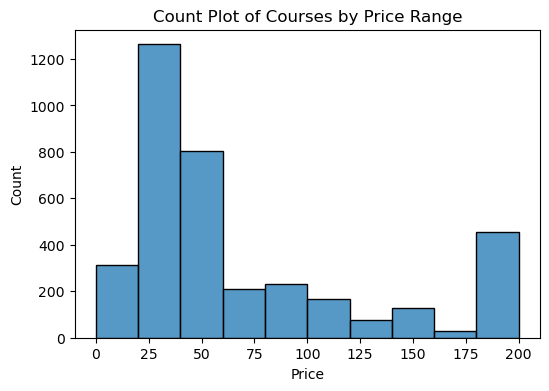

In [24]:
# Count plot of Courses by Price Range
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='price', bins=10)
plt.title("Count Plot of Courses by Price Range")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

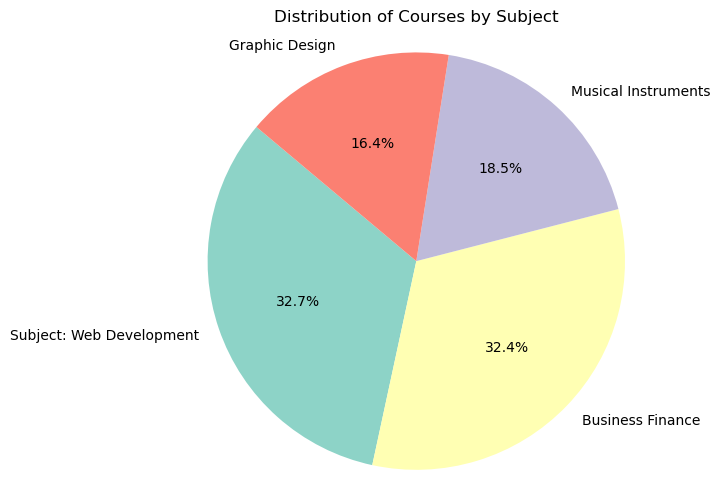

In [25]:
# Calculate the count of courses by subject
subject_counts = data['subject'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title("Distribution of Courses by Subject")
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

In [26]:
# Encode categorical variables (one-hot encoding)
data_encoded = pd.get_dummies(data, columns=['level', 'subject'], drop_first=True)

In [27]:
# Split the data
X = data_encoded.drop(columns=['Rating'])  # Features
y = data_encoded['Rating']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Step 2: Feature Selection (Selected features based on relevance)
selected_features = ['num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'price']

In [29]:
# Step 3: Model Selection
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train[selected_features], y_train)

LinearRegression()

In [30]:
# Step 4: Model Evaluation
# Make predictions on test data
y_pred = model.predict(X_test[selected_features])

In [31]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.10998534452695422
R-squared: 0.0010160765338625977
